 #                                      Communicate Data Findings
#####                                                                Factors that impact the optimum loan for an applicant.

# Introduction:
#### This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
###### The aim of the data analysis is to provide a graphical summary of important features of the data set and predicting the Loan outcome in the dataset.

# Import of the needed libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("prosperLoanData.csv")
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


# Null Values in dataset

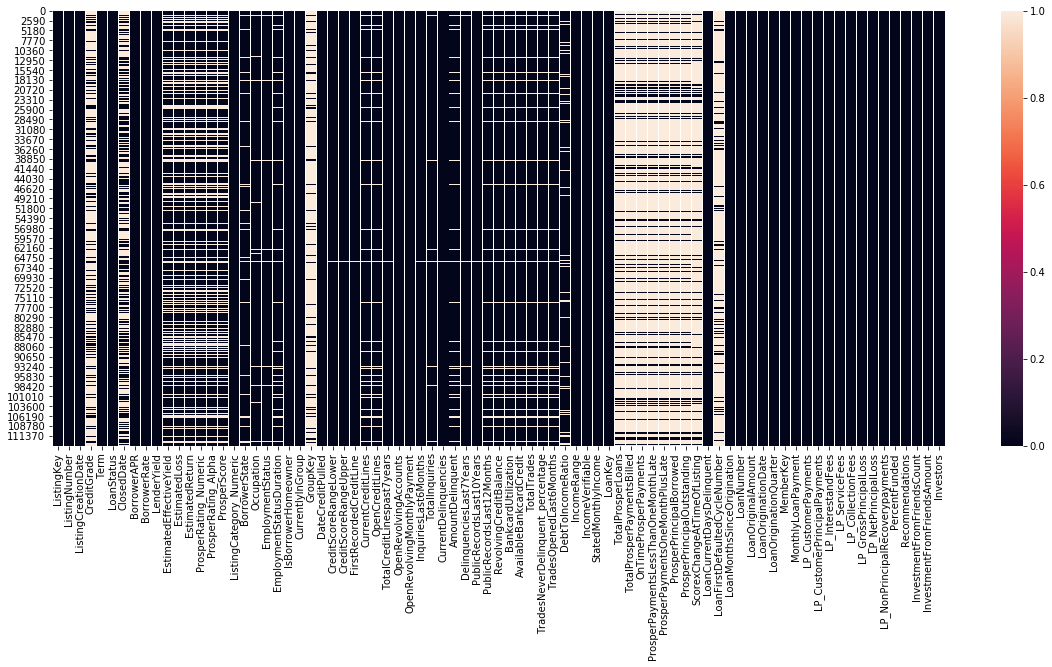

In [8]:
fig, ax = plt.subplots(figsize = (20,8))
ax = sns.heatmap(df.isnull(), vmin=0, vmax = 1)

# Checking for duplicate values
Notes: The dataset contains alot of missing data.

In [9]:
df[df.duplicated()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


Notes: No duplicates present

In [10]:
df.rename(columns={'ListingCategory (numeric)' : 'ListingCategory_Numeric','ProsperRating (Alpha)': 'ProsperRating_Alpha', 'ProsperRating (numeric)': 'ProsperRating_Numeric','TradesNeverDelinquent (percentage)':'TradesNeverDelinquent_percentage'}, inplace=True)
# Due to many variables in this dataset, I only use few variables. Those are:  
column = ['ListingKey' ,'ListingNumber' ,'Term' , 'LoanStatus', 'EstimatedEffectiveYield' ,  'BorrowerAPR' , 
        'BorrowerRate' , 'ProsperRating_Numeric', 'ProsperRating_Alpha', 'ProsperScore', 'ListingCategory_Numeric', 
        'EmploymentStatus', 'Occupation',  'EmploymentStatusDuration',  'IsBorrowerHomeowner',  'IncomeVerifiable', 
        'StatedMonthlyIncome',  'MonthlyLoanPayment', 'Recommendations',  'DebtToIncomeRatio', 'LoanOriginalAmount' ,
        'PercentFunded', 'IncomeRange', 'Investors', 'BorrowerState']
loan=df[column]
#### Removing null Value Data for better visualisation experience
loan_clean=loan.dropna()

In [11]:
loan.head()

,ListingKey,ListingNumber,Term,LoanStatus,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating_Numeric,ProsperRating_Alpha,ProsperScore,...,IncomeVerifiable,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,IncomeRange,Investors,BorrowerState
0,1021339766868145413AB3B,193129,36,Completed,NaN,0.16516,0.1580,NaN,NaN,NaN,...,True,3083.333333,330.43,0,0.17,9425,1.0,"$25,000-49,999",258,CO
1,10273602499503308B223C1,1209647,36,Current,0.07960,0.12016,0.0920,6.0,A,7.0,...,True,6125.000000,318.93,0,0.18,10000,1.0,"$50,000-74,999",1,CO
2,0EE9337825851032864889A,81716,36,Completed,NaN,0.28269,0.2750,NaN,NaN,NaN,...,True,2083.333333,123.32,0,0.06,3001,1.0,Not displayed,41,GA
3,0EF5356002482715299901A,658116,36,Current,0.08490,0.12528,0.0974,6.0,A,9.0,...,True,2875.000000,321.45,0,0.15,10000,1.0,"$25,000-49,999",158,GA
4,0F023589499656230C5E3E2,909464,36,Current,0.18316,0.24614,0.2085,3.0,D,4.0,...,True,9583.333333,563.97,0,0.26,15000,1.0,"$100,000+",20,MN


##### Summary of Exploratory Data
###### 1. Univariate Exploration
.Original Loan amount is right skewed. Most of the loan amount are in range of 0-5000.

.Most of the Loan status is Current. Apart from it we can see alot of completed loan case.

.54.4% of the borrower's are homeowner.

.Most of the borrowers are employed amd full-time worker.

.There are very few people(4.7%) with income less than 24,999.

.Loans with "AA" category are with lesser count

.There are alot of borrower's with prosperScore less than 6.0. Based on this we can say loan was even provided to people .with high risk score.

.Most of the borrower's didn't specify there occupation that was given in form, they wrote Other.

.Apart from that "Professional", "Executive", "Computer Programmer", "Teacher", and "Analyst" are the top 5 most common occupations of the borrower's.

.There are 0.1% borrowers without verfied income.

.50% of borrowerARP is in range of 0.161570 - 0.287800

.The borrowers rate follow an approximately unimodal distribution, with the peak around 0.16

.The monthly income the borrower stated at the time the listing was created. Monthly Income will definitely be right skewed .since very few people will be having a higher salary.

##### 2. Bivariate Exploration
Negative correlation between BorrowerRate and Prosper Score, means lower the prosper rate, higher will be the borrower rate

Higher loan amount is associated with high monthly payment, as they are have strong positive correlation.

Loan original amount and monthly loan payment is highly positive correlated,

Borrowers interest rate and proper score are highly negatively correlated,

Borrower interest rate and Loan original amount are negatively correlated.

Full-time employs have generally high prosper rating than others.

Self-employed people have low prosper rating

Executives, Pharmacist, Doctors and Judge have large loan amount in comparision to other occupants

People with high Income range took high loan amount.
Prosper Rating B and C have most number of people who are employed.

Borrowers with salary range are between 50,000− 74,999 are mostly in prosper rating of A, B, C or D.

#### 3. Multivariate Exploration
Based on the Prosper Rating we can conclude that large amount of amount of loan is easily provided to those who have high monthly salary and are employed or full-time worker.

Employment Status And Monthly Salary can be considered few parameter that affected Prosper Rating.

Employed, Self-employed and full-time borrowers generally have high monthly amount who takes loan.

Employed people tends to take larger loan amount in comparision to other Employment status irrespective of their Income Range.

People who are self-employed and have decent salary between 75000− 99999 apply for loan to fulfill their needs.

The non-homeowner tend to have a higher interest rate, and thus lower prosper rating. On the other hand homeowner tends to have lower interest rate and higher prosper rating. So we can conclude that homeowner are the safest bet when gving a loan. We can see that HR prosper rating applicants have higher interest rates

In [12]:
loan_clean.describe()

,ListingNumber,Term,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating_Numeric,ProsperScore,ListingCategory_Numeric,EmploymentStatusDuration,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,Investors
count,7.621600e+04,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000
mean,7.737463e+05,42.760470,0.166738,0.223901,0.193621,4.132413,6.080246,3.302259,104.578028,6002.833586,296.421859,0.016571,0.258032,9294.999410,0.998131,69.998517
std,2.344166e+05,11.744005,0.067595,0.079372,0.074088,1.661460,2.360640,4.396670,95.836443,5110.743506,189.674943,0.187732,0.320587,6413.404265,0.020572,97.801415
min,4.162750e+05,12.000000,-0.181600,0.045830,0.040000,1.000000,1.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,1000.000000,0.700000,1.000000
25%,5.603650e+05,36.000000,0.114800,0.161570,0.134900,3.000000,4.000000,1.000000,32.000000,3583.333333,159.062500,0.000000,0.150000,4000.000000,1.000000,1.000000
50%,7.425500e+05,36.000000,0.157670,0.215660,0.184500,4.000000,6.000000,1.000000,76.000000,5041.666667,257.760000,0.000000,0.220000,8000.000000,1.000000,32.000000
75%,9.747142e+05,60.000000,0.219000,0.287800,0.254900,5.000000,8.000000,3.000000,150.000000,7250.000000,392.420000,0.000000,0.320000,14603.250000,1.000000,100.000000
max,1.255149e+06,60.000000,0.319900,0.423950,0.360000,7.000000,11.000000,20.000000,755.000000,483333.333333,2251.510000,19.000000,10.010000,35000.000000,1.012500,1189.000000


# Explanatory Data Visualization
##### Question : Does loan amount impact the borrower interest rate?

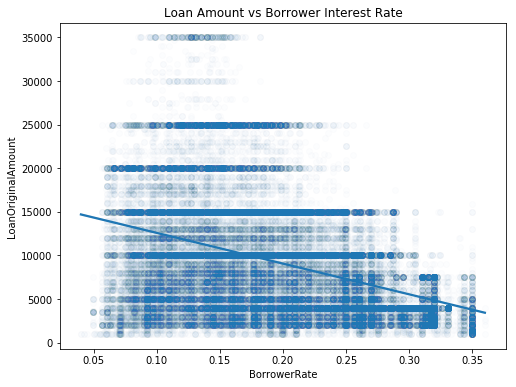

In [13]:
plt.figure(figsize = [8, 6])
sns.regplot(data = loan_clean, x = 'BorrowerRate', y ="LoanOriginalAmount",scatter_kws = {'alpha' : 1/100})
plt.title("Loan Amount vs Borrower Interest Rate");

# Conclusion:
###### Borrower interest rate and Loan original amount have moderate negative correlation. Thus we expect that for higher loan amount, the borrower interest rate will be lesser.

###### Question : What is the impact of prosper score on borrower interest rate?

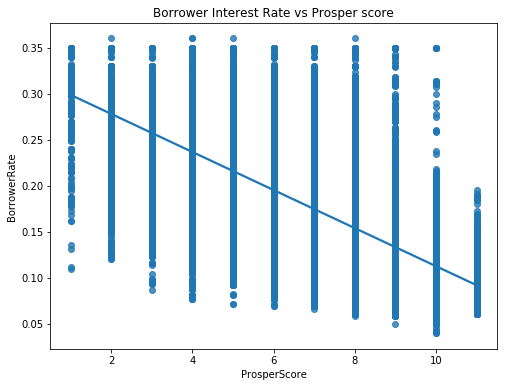

In [14]:
plt.figure(figsize = [8, 6])
sns.regplot(data = loan_clean, x = 'ProsperScore', y ="BorrowerRate")
plt.title("Borrower Interest Rate vs Prosper score");

# Conclusion:
##### Borrowers interest rate and proper score are negatively correlated. With lower prosper score, the borrower interest rate tends to increase. Therefore, more the prosper score will be, lesser will be the interest rate.


##### Question: Can we conclude anything regarding the relationship between ProsperScore and Employment Status?? Does certain Employment status lead to better chance of getting optimum loan ?

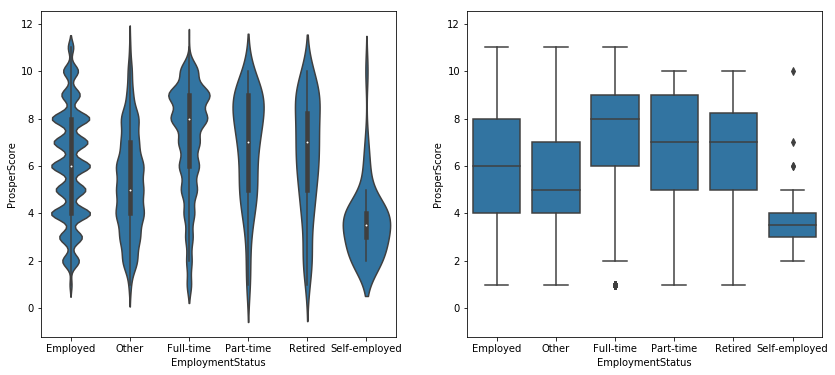

In [15]:
loan_df= loan_clean[loan_clean['IncomeRange'] != 'Not employed']
plt.figure(figsize = [14, 6])
base_color = sns.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data = loan_df, x = 'EmploymentStatus', y = 'ProsperScore', color = base_color)

# right plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data = loan_df, x = 'EmploymentStatus', y = 'ProsperScore', color = base_color)
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

##### Conslusion:
Full-time employs have generally high prosper rating than others, and have better chance of getting loan easily with lesser borrower interest rate.
Self-employed people have low prosper rating, thus it's hard for them to get high loan amount with lesser borrower interest rate.

##### Question: Can we find any conclusion using prosper rating, loan amount and income range?

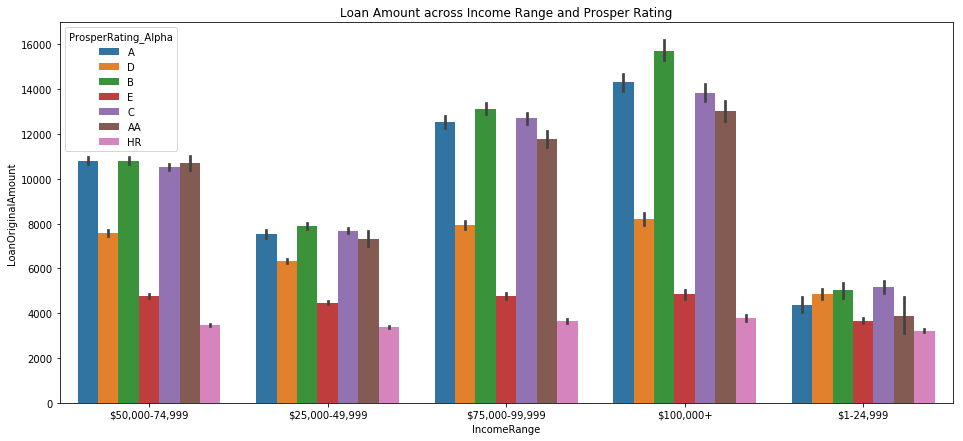

In [16]:
loan_clean_sub = loan_clean[(loan_clean['StatedMonthlyIncome'] <= 10000) ]
loan_clean_sub = loan_clean_sub[loan_clean_sub['IncomeRange'] != 'Not employed']
loan_clean_sub = loan_clean_sub[loan_clean_sub.EmploymentStatus != 'Not employed']
plt.figure(figsize = [16, 7])
loan_clean_sub = loan_clean_sub[loan_clean_sub['IncomeRange'] != 'Not employed']
ax = sns.barplot(data = loan_clean_sub, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'ProsperRating_Alpha',order=loan_clean_sub.IncomeRange.value_counts().index)
ax.legend(loc=2,  title = 'ProsperRating_Alpha')
plt.title('Loan Amount across Income Range and Prosper Rating');

##### Conclusion:
Large amount of loan is easily provideed to those will high income range and they have generally better prosper rating than other, thus their borrower interest rate would alse be lesser than others.


##### Question : Does being a Homeownner any impact on Borrower Rate and Prosper Rating ?

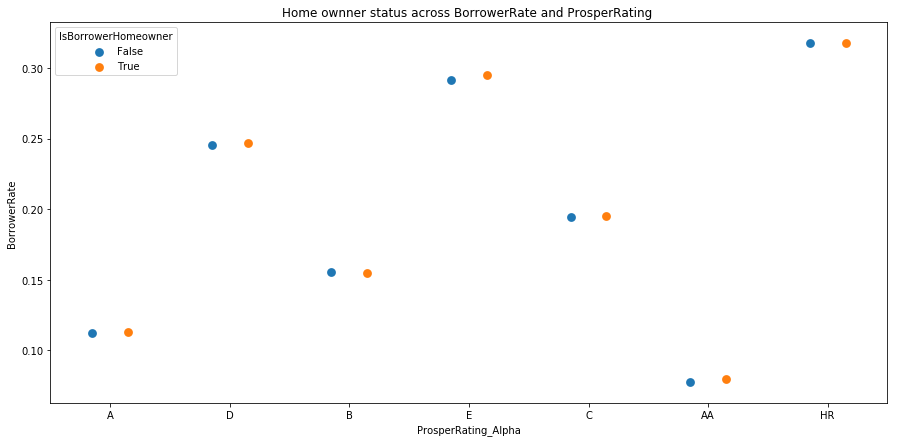

In [17]:
plt.figure(figsize = [15, 7])
ax = sns.pointplot(data = loan_clean_sub, x = 'ProsperRating_Alpha', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner',dodge = 0.3, linestyles = "");
plt.title('Home ownner status across BorrowerRate and ProsperRating ');

###### Relationship between Loan Status and Prosper Score

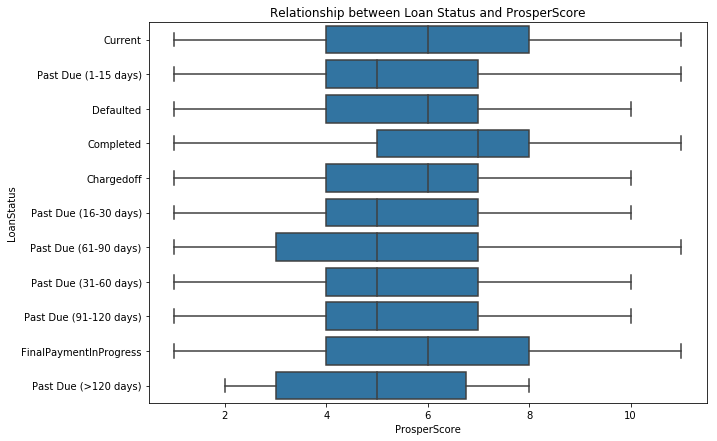

In [18]:
plt.figure(figsize = [10, 7])
base_color = sns.color_palette()[0]

sns.boxplot(data = loan_clean, y = 'LoanStatus', x = 'ProsperScore', color = base_color)
plt.title("Relationship between Loan Status and ProsperScore");

##### Relationship between ProsperScore and Employment Status

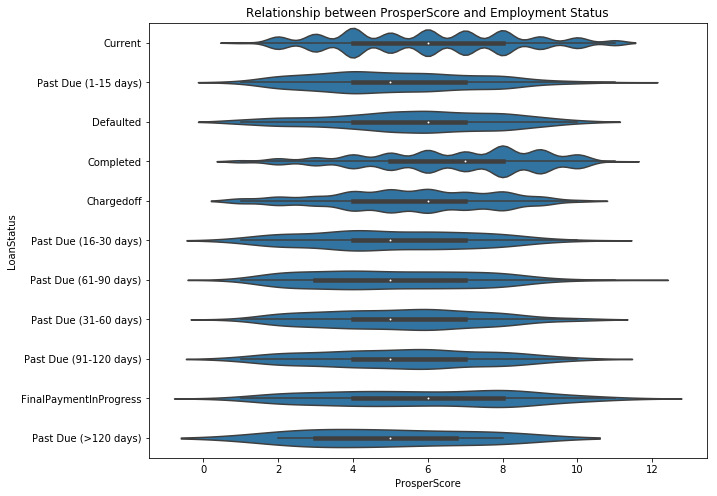

In [19]:
plt.figure(figsize = [10, 8])
base_color = sns.color_palette()[0]
sns.violinplot(data = loan_clean, y = 'LoanStatus', x = 'ProsperScore', color = base_color)
plt.title("Relationship between ProsperScore and Employment Status");

# Relationship between Occupation and Loan Amount
#### Question : Which Occupants generally have high loan amount than others??

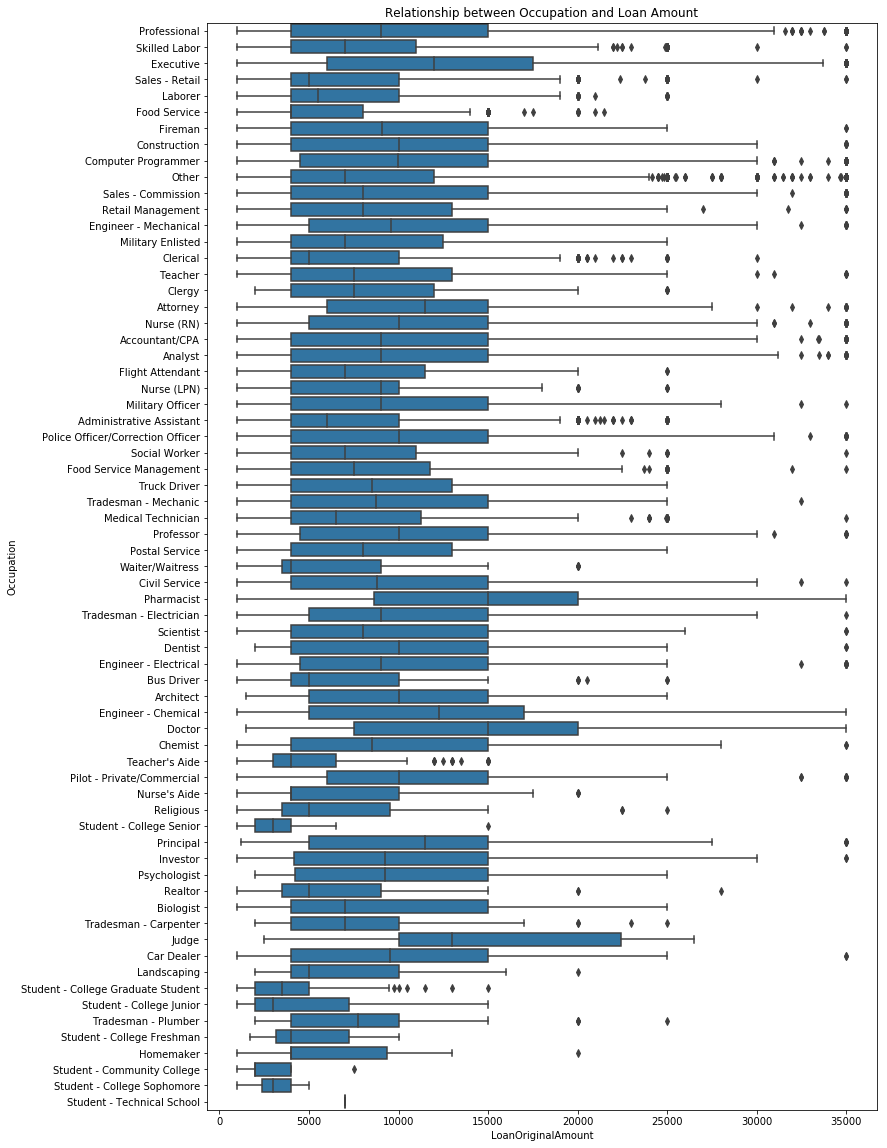

In [20]:
plt.figure(figsize = [12, 20])
base_color = sns.color_palette()[0]
sns.boxplot(data = loan_clean, y = 'Occupation', x = 'LoanOriginalAmount', color = base_color) # set y-axis limits to be same as left plot
plt.title("Relationship between Occupation and Loan Amount");

##### Conclusion:

Executives, Pharmacist, Doctors and Judge have large loan amount in comparision to other occupants

##### Conclusion:
We observe that non-homeowner tend to have a higher interest rate, and thus lower prosper rating. On the other hand homeowner tends to have lower interest rate and higher prosper rating. So we can conclude that homeowner are the safest bet when gving a loan. We can see that HR prosper rating applicants have higher interest rates

##  Key Insights:
Large amount of loan is easily provideed to those will high income range and they have generally better prosper rating than other, thus their borrower interest rate would alse be lesser than others.

Full-time employs have generally high prosper rating than others, and have better chance of getting loan easily with lesser borrower interest rate.

Self-employed people have low prosper rating, thus it's hard for them to get high loan amount with lesser borrower interest rate.
Employment Status And Income Range can be considered few parameter that affected Prosper Rating.
We observe that non-homeowner tend to have a higher interest rate, and thus lower prosper rating. On the other hand homeowner tends to have lower interest rate and higher prosper rating. So we can conclude that homeowner are the safest bet when gving a loan. We can see that HR prosper rating applicants have higher interest rates

Borrowers interest rate and proper score are negatively correlated. With lower prosper score, the borrower interest rate tends to increase. Therefore, more the prosper score will be, lesser will be the interest rate.

Borrower interest rate and Loan original amount have moderate negative correlation. Thus we expect that for higher loan amount, the borrower interest rate will be lesser.